# Distinguish Your Own Digits (DYOD)

You are going to write a classifier that distinguishes between the number 3 and number 8.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From the command line run `pip install mnist`. This is a library that will help you bring down the mnist dataset. If you run this from a notebook, you need to put  `!pip install mnist` in a cell by itself.

In [3]:
!pip install mnist

## Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


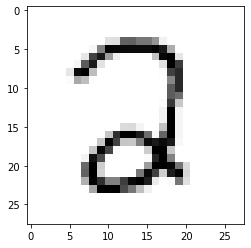

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

In [15]:
#Impoting functions from 'Kudzu'
from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Sampler,Dataloader

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

from kudzu.layer import Sigmoid,Relu
from kudzu.layer import Affine

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.


In [17]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [18]:
training_data_x = X_train
testing_data_x = X_test
training_data_y = y_train.reshape(-1,1)
testing_data_y = y_test.reshape(-1,1)

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("last", 2, 1), Sigmoid("last")]
model_nn = Model(layers)
model_lr = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

xavier
xavier
xavier
xavier
xavier


In [20]:
nn_learner = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(nn_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
nn_learner.set_callbacks([acc_nn])

In [21]:
lr_learner = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(lr_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
lr_learner.set_callbacks([acc_lr])

In [22]:
nn_learner.train_loop(dl)

Epoch 0, Loss 0.2588
Training Accuracy: 0.5166, Testing Accuracy: 0.5020



Epoch 10, Loss 0.0998
Training Accuracy: 0.9068, Testing Accuracy: 0.9209



Epoch 20, Loss 0.0593
Training Accuracy: 0.9360, Testing Accuracy: 0.9461



Epoch 30, Loss 0.0461
Training Accuracy: 0.9484, Testing Accuracy: 0.9546



Epoch 40, Loss 0.0394
Training Accuracy: 0.9548, Testing Accuracy: 0.9617



Epoch 50, Loss 0.0354
Training Accuracy: 0.9587, Testing Accuracy: 0.9657



Epoch 60, Loss 0.0327
Training Accuracy: 0.9621, Testing Accuracy: 0.9672



Epoch 70, Loss 0.0306
Training Accuracy: 0.9646, Testing Accuracy: 0.9677



Epoch 80, Loss 0.029
Training Accuracy: 0.9661, Testing Accuracy: 0.9693



Epoch 90, Loss 0.0277
Training Accuracy: 0.9679, Testing Accuracy: 0.9693



Epoch 100, Loss 0.0267
Training Accuracy: 0.9685, Testing Accuracy: 0.9693



Epoch 110, Loss 0.0257
Training Accuracy: 0.9700, Testing Accuracy: 0.9708



Epoch 120, Loss 0.0249
Training Accuracy: 0.9709, Testing Accuracy: 0.9708



Epoch 130, Loss 0.0242
Training Accuracy: 0.9715, Testing Accuracy: 0.9713



Epoch 140, Loss 0.0235
Training Accuracy: 0.9725, Testing Accuracy: 0.9718



Epoch 150, Loss 0.0229
Training Accuracy: 0.9735, Testing Accuracy: 0.9723



Epoch 160, Loss 0.0224
Training Accuracy: 0.9743, Testing Accuracy: 0.9728



Epoch 170, Loss 0.0219
Training Accuracy: 0.9754, Testing Accuracy: 0.9733



Epoch 180, Loss 0.0214
Training Accuracy: 0.9756, Testing Accuracy: 0.9723



Epoch 190, Loss 0.0209
Training Accuracy: 0.9763, Testing Accuracy: 0.9738



Epoch 200, Loss 0.0205
Training Accuracy: 0.9768, Testing Accuracy: 0.9753



Epoch 210, Loss 0.0201
Training Accuracy: 0.9771, Testing Accuracy: 0.9758



Epoch 220, Loss 0.0197
Training Accuracy: 0.9780, Testing Accuracy: 0.9758



Epoch 230, Loss 0.0193
Training Accuracy: 0.9780, Testing Accuracy: 0.9748



Epoch 240, Loss 0.019
Training Accuracy: 0.9786, Testing Accuracy: 0.9758



0.0006316104651358867

In [23]:
lr_learner.train_loop(dl)

Epoch 0, Loss 0.2374
Training Accuracy: 0.6879, Testing Accuracy: 0.6976



Epoch 10, Loss 0.107
Training Accuracy: 0.8954, Testing Accuracy: 0.9118



Epoch 20, Loss 0.0817
Training Accuracy: 0.9219, Testing Accuracy: 0.9360



Epoch 30, Loss 0.0699
Training Accuracy: 0.9333, Testing Accuracy: 0.9466



Epoch 40, Loss 0.0629
Training Accuracy: 0.9397, Testing Accuracy: 0.9506



Epoch 50, Loss 0.0581
Training Accuracy: 0.9425, Testing Accuracy: 0.9546



Epoch 60, Loss 0.0547
Training Accuracy: 0.9453, Testing Accuracy: 0.9556



Epoch 70, Loss 0.052
Training Accuracy: 0.9473, Testing Accuracy: 0.9577



Epoch 80, Loss 0.0499
Training Accuracy: 0.9490, Testing Accuracy: 0.9582



Epoch 90, Loss 0.0481
Training Accuracy: 0.9507, Testing Accuracy: 0.9587



Epoch 100, Loss 0.0467
Training Accuracy: 0.9516, Testing Accuracy: 0.9597



Epoch 110, Loss 0.0454
Training Accuracy: 0.9531, Testing Accuracy: 0.9607



Epoch 120, Loss 0.0443
Training Accuracy: 0.9543, Testing Accuracy: 0.9627



Epoch 130, Loss 0.0434
Training Accuracy: 0.9554, Testing Accuracy: 0.9632



Epoch 140, Loss 0.0425
Training Accuracy: 0.9566, Testing Accuracy: 0.9647



Epoch 150, Loss 0.0417
Training Accuracy: 0.9572, Testing Accuracy: 0.9642



Epoch 160, Loss 0.0411
Training Accuracy: 0.9575, Testing Accuracy: 0.9647



Epoch 170, Loss 0.0404
Training Accuracy: 0.9579, Testing Accuracy: 0.9647



Epoch 180, Loss 0.0398
Training Accuracy: 0.9583, Testing Accuracy: 0.9652



Epoch 190, Loss 0.0393
Training Accuracy: 0.9586, Testing Accuracy: 0.9647



Epoch 200, Loss 0.0388
Training Accuracy: 0.9590, Testing Accuracy: 0.9647



Epoch 210, Loss 0.0384
Training Accuracy: 0.9597, Testing Accuracy: 0.9647



Epoch 220, Loss 0.0379
Training Accuracy: 0.9599, Testing Accuracy: 0.9647



Epoch 230, Loss 0.0375
Training Accuracy: 0.9600, Testing Accuracy: 0.9657



Epoch 240, Loss 0.0372
Training Accuracy: 0.9605, Testing Accuracy: 0.9662



0.04614333635233624

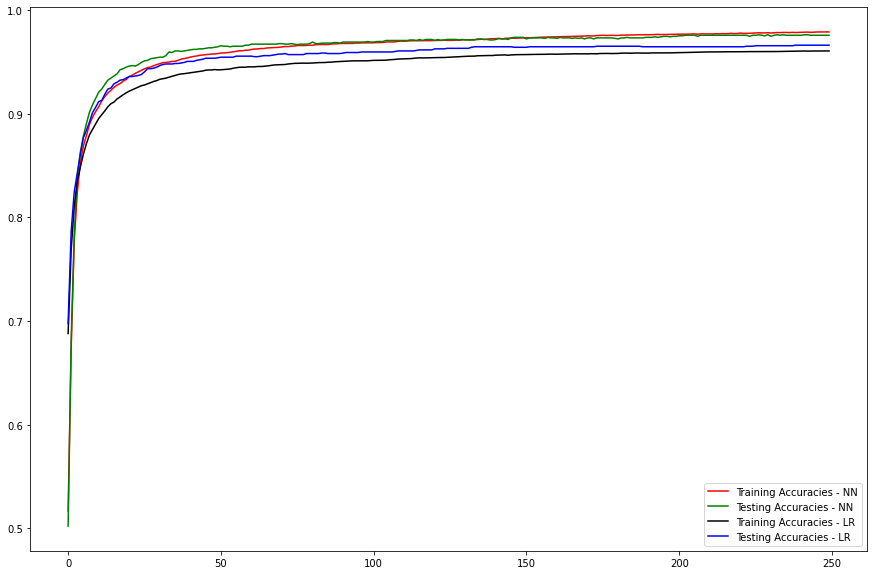

In [24]:
#comparing the results of NN and LR
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")
plt.legend()

#### Plotting the outputs of this layer of the NN.


In [25]:
new_model = Model(layers[:-2])
testing_plot = new_model(testing_data_x)

Text(0.5, 1.0, 'Outputs')

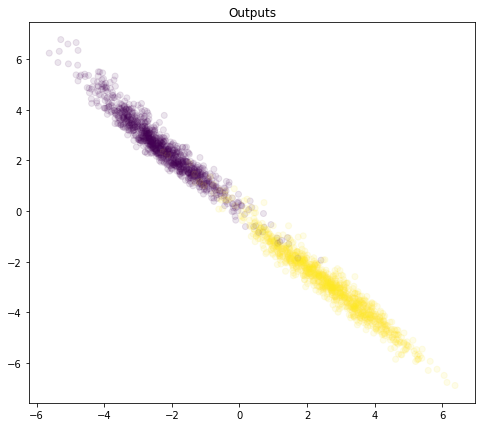

In [26]:
# Plotting the scatter plot of points and color coding by class
plt.figure(figsize=(8,7))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

Probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
#creating the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_gridflat = np.ravel(x_grid)
y_gridflat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_gridflat, y_gridflat)).T

prob_contour = model_prob(X).reshape(100,100) 

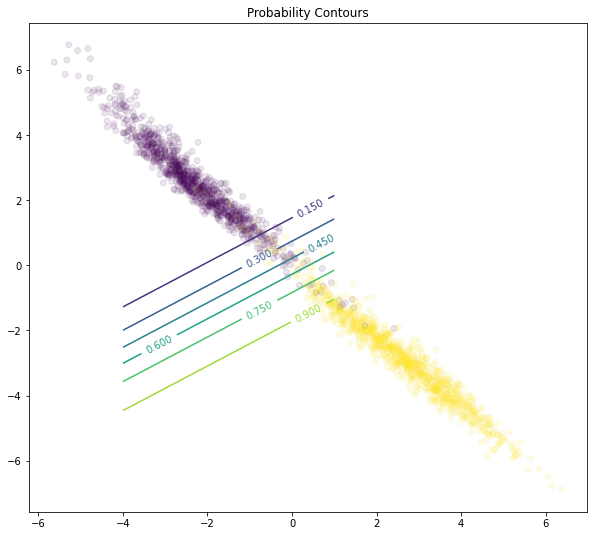

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,prob_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );